
## GeostatsPy: Basic Univariate Distribution Transformations  Subsurface Data Analytics in Python 


### Michael Pyrcz, Associate Professor, University of Texas at Austin 

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)


### PGE 383 Exercise: Basic Univariate Distribution Transformations  Subsurface Data Analytics in Python with GeostatsPy

Here's a simple workflow with some basic univariate distribution transformations for subsurface modeling workflows. This should help you get started data transformations.  

#### Data Distribution Transformations

Why?:
* variable has expected shape / correcting for too few data
* a specific distribution assumption is required
* correct for outliers

How?:

There are a variety of transformations. In general we are transforming the values from the cumulative distribution function (CDF), $F_{X}$, to a new CDF , $G_{Y}$. This can be generalized with the quantile - quantile transformation applied to all the sample data:   

* The forward transform:

\begin{equation}
Y = G_{Y}^{-1}(F_{X}(X))
\end{equation}

* The reverse transform:

\begin{equation}
X = F_{X}^{-1}(G_{Y}(Y))
\end{equation}

This may be applied to any data, nonparametric or samples from a parametric distribution. We just need to be able to map from one distribution to another through percentiles, so it is a:

* Rank preserving transform

We will cover three examples including:

1. Distribution rescaling
2. Normal score transform

#### Objective 

In the PGE 383: Stochastic Subsurface Modeling class I want to provide hands-on experience with building subsurface modeling workflows. Python provides an excellent vehicle to accomplish this. I have coded a package called GeostatsPy with GSLIB: Geostatistical Library (Deutsch and Journel, 1998) functionality that provides basic building blocks for building subsurface modeling workflows. 

The objective is to remove the hurdles of subsurface modeling workflow construction by providing building blocks and sufficient examples. This is not a coding class per se, but we need the ability to 'script' workflows working with numerical methods.    

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

You will need to copy the data file to your working directory.  They are available here:

* Tabular data - sample_data_biased.csv at https://git.io/fh0CW

There are exampled below with these functions. You can go here to see a list of the available functions, https://git.io/fh4eX, other example workflows and source code. 

In [1]:
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python        

We will also need some standard packages. These should have been installed with Anaconda 3.

In [2]:
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
from scipy import stats                   # summary statistics

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [3]:
os.chdir("c:/PGE383/Examples")             # set the working directory

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object.  

In [4]:
df = pd.read_csv('sample_data_biased.csv')     # load our data table (wrong name!)

It worked, we loaded our file into our DataFrame called 'df'. But how do you really know that it worked? Visualizing the DataFrame would be useful and we already leard about these methods in this demo (https://git.io/fNgRW). 

We can preview the DataFrame by printing a slice or by utilizing the 'head' DataFrame member function (with a nice and clean format, see below). With the slice we could look at any subset of the data table and with the head command, add parameter 'n=13' to see the first 13 rows of the dataset.  

In [5]:
print(df.iloc[0:5,:])                   # display first 4 samples in the table as a preview
df.head(n=13)                           # we could also use this command for a table preview

     X    Y  Facies  Porosity       Perm
0  100  900       1  0.115359   5.736104
1  100  800       1  0.136425  17.211462
2  100  600       1  0.135810  43.724752
3  100  500       0  0.094414   1.609942
4  100  100       0  0.113049  10.886001


,X,Y,Facies,Porosity,Perm
0,100,900,1,0.115359,5.736104
1,100,800,1,0.136425,17.211462
2,100,600,1,0.135810,43.724752
3,100,500,0,0.094414,1.609942
4,100,100,0,0.113049,10.886001
5,200,800,1,0.154648,106.491795
6,200,700,1,0.153113,140.976324
7,200,500,1,0.126167,12.548074
8,200,400,0,0.094750,1.208561
9,200,100,1,0.150961,44.687430


#### Summary Statistics for Tabular Data

The table includes X and Y coordinates (meters), Facies 1 and 2 (1 is sandstone and 0 interbedded sand and mudstone), Porosity (fraction), and permeability as Perm (mDarcy). 

There are a lot of efficient methods to calculate summary statistics from tabular data in DataFrames. The describe command provides count, mean, minimum, maximum, and quartiles all in a nice data table. We use transpose just to flip the table so that features are on the rows and the statistics are on the columns.

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,289.0,475.813149,254.277530,0.000000,300.000000,430.000000,670.000000,990.000000
Y,289.0,529.692042,300.895374,9.000000,269.000000,549.000000,819.000000,999.000000
Facies,289.0,0.813149,0.390468,0.000000,1.000000,1.000000,1.000000,1.000000
Porosity,289.0,0.134744,0.037745,0.058548,0.106318,0.126167,0.154220,0.228790
Perm,289.0,207.832368,559.359350,0.075819,3.634086,14.908970,71.454424,5308.842566


#### Visualizing Tabular Data with Location Maps 

It is natural to set the x and y coordinate and feature ranges manually. e.g. do you want your color bar to go from 0.05887 to 0.24230 exactly? Also, let's pick a color map for display. I heard that plasma is known to be friendly to the color blind as the color and intensity vary together (hope I got that right, it was an interesting Twitter conversation started by Matt Hall from Agile if I recall correctly). We will assume a study area of 0 to 1,000m in x and y and omit any data outside this area.

In [7]:
xmin = 0.0; xmax = 1000.0               # range of x values
ymin = 0.0; ymax = 1000.0               # range of y values
pormin = 0.05; pormax = 0.25;           # range of porosity values
cmap = plt.cm.plasma                    # color map

Let's try out locmap. This is a reimplementation of GSLIB's locmap program that uses matplotlib. I hope you find it simpler than matplotlib, if you want to get more advanced and build custom plots lock at the source. If you improve it, send me the new code. Any help is appreciated. To see the parameters, just type the command name:

In [8]:
GSLIB.locmap

<function geostatspy.GSLIB.locmap(df, xcol, ycol, vcol, xmin, xmax, ymin, ymax, vmin, vmax, title, xlabel, ylabel, vlabel, cmap, fig_name)>

Now we can populate the plotting parameters and visualize the porosity data.

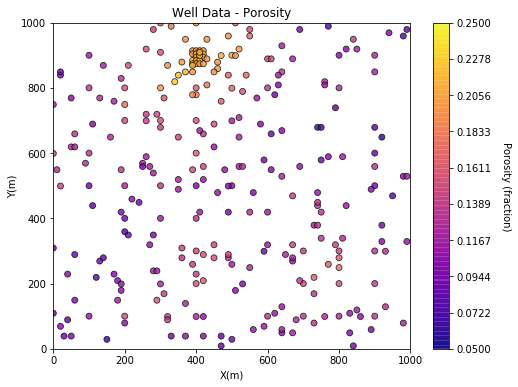

In [9]:
GSLIB.locmap(df,'X','Y','Porosity',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Porosity','X(m)','Y(m)','Porosity (fraction)',cmap,'locmap_Porosity')

#### Decluster the Data

Look carefully, and you'll notice the the spatial samples are more dense in the high porosity regions and less dense in the low porosity regions. There is preferential sampling. We cannot use the naive statistics to represent this region. We have to correct for the clustering of the samples in the high porosity regions. 

Let's try cell declustering. We can interpret that we will want to minimize the declustering mean and that a cell size of between 100 - 200m is likely a good cell size, this is 'an ocular' estimate of the largest average spacing in the sparsely sampled regions.   

Let's check out the declus program reimplimented from GSLIB.

In [10]:
geostats.declus

<function geostatspy.geostats.declus(df, xcol, ycol, vcol, iminmax, noff, ncell, cmin, cmax)>

We can now populate the parameters. We will run a very wide range of cell sizes, from 10m to 2,000m ('cmin' and 'cmax') and take the cell size that minimizes the declustered mean ('iminmax' = 1 minimize, and = 0 maximize). Multiple offsets (number of these is 'noff') uses multiple grid origins and averages the results to remove sensitivity to grid position.  The ncell is the number of cell sizes.

The output from this program is:

* wts - an array with the weigths for each data (they sum to the number of data, 1 indicates nominal weight)
* cell_sizes - an array with the considered cell sizes
* dmeans - de an 

In [11]:
wts, cell_sizes, dmeans = geostats.declus(df,'X','Y','Porosity',iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
df['Wts'] = wts                            # add weights to the sample data DataFrame
df.head()                                  # preview to check the sample data DataFrame

There are 289 data with:
   mean of      0.13474387540138408 
   min and max  0.058547873 and 0.228790002
   standard dev 0.03767982164385207 


,X,Y,Facies,Porosity,Perm,Wts
0,100,900,1,0.115359,5.736104,3.064286
1,100,800,1,0.136425,17.211462,1.076608
2,100,600,1,0.135810,43.724752,0.997239
3,100,500,0,0.094414,1.609942,1.165119
4,100,100,0,0.113049,10.886001,1.224164


Let's look at the location map of the weights.

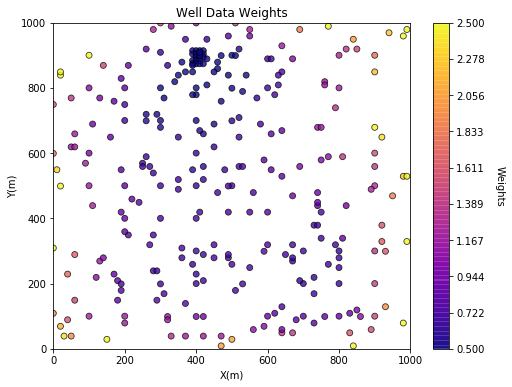

In [12]:
GSLIB.locmap(df,'X','Y','Wts',xmin,xmax,ymin,ymax,0.5,2.5,'Well Data Weights','X(m)','Y(m)','Weights',cmap,'locmap_Weights')

Does it look correct?  See the weight varies with local sampling density?  

Now let's add the distribution of the weights and the naive and declustered porosity distributions. You should see the histogram bars adjusted by the weights. Also note the change in the mean due to the weights. There is a significant change.

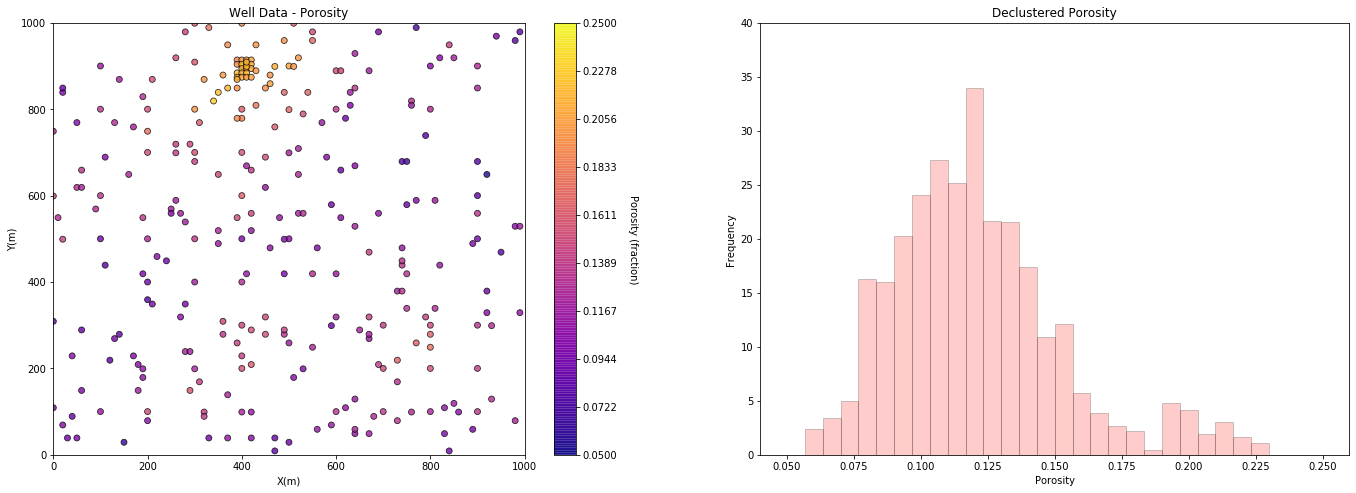

In [13]:
plt.subplot(121)
GSLIB.locmap_st(df,'X','Y','Porosity',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Porosity','X(m)','Y(m)','Porosity (fraction)',cmap)

plt.subplot(122)
GSLIB.hist_st(df['Porosity'],0.05,0.25,log=False,cumul=False,bins=30,weights=df['Wts'],xlabel="Porosity",title="Declustered Porosity")
plt.ylim(0.0,40)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.5, wspace=0.2, hspace=0.2)
plt.show()

We are now ready to do some data transformations.

#### Distribution Rescaling

Distribution rescaling can be thought of as shifting, and stretching and squeezing a distribution. The common method is known as affine correction:

\begin{equation}
y = \frac{\sigma_y}{\sigma_x}(y - \overline{y}) + \overline{x}
\end{equation}

We can see that the metho first centers the distribution, the rescales the dispersion based on the ratio of the new standard deviation to the original standard deviation and then shifts the distribution to centered on the target mean.

We have a function in GeostatsPy to do the affine correction of the distribution.

In [14]:
GSLIB.affine

<function geostatspy.GSLIB.affine(array, tmean, tstdev)>

We just need to specify the new target mean and variance.  Let's make 2 new rescaled distributions and then plot the results.

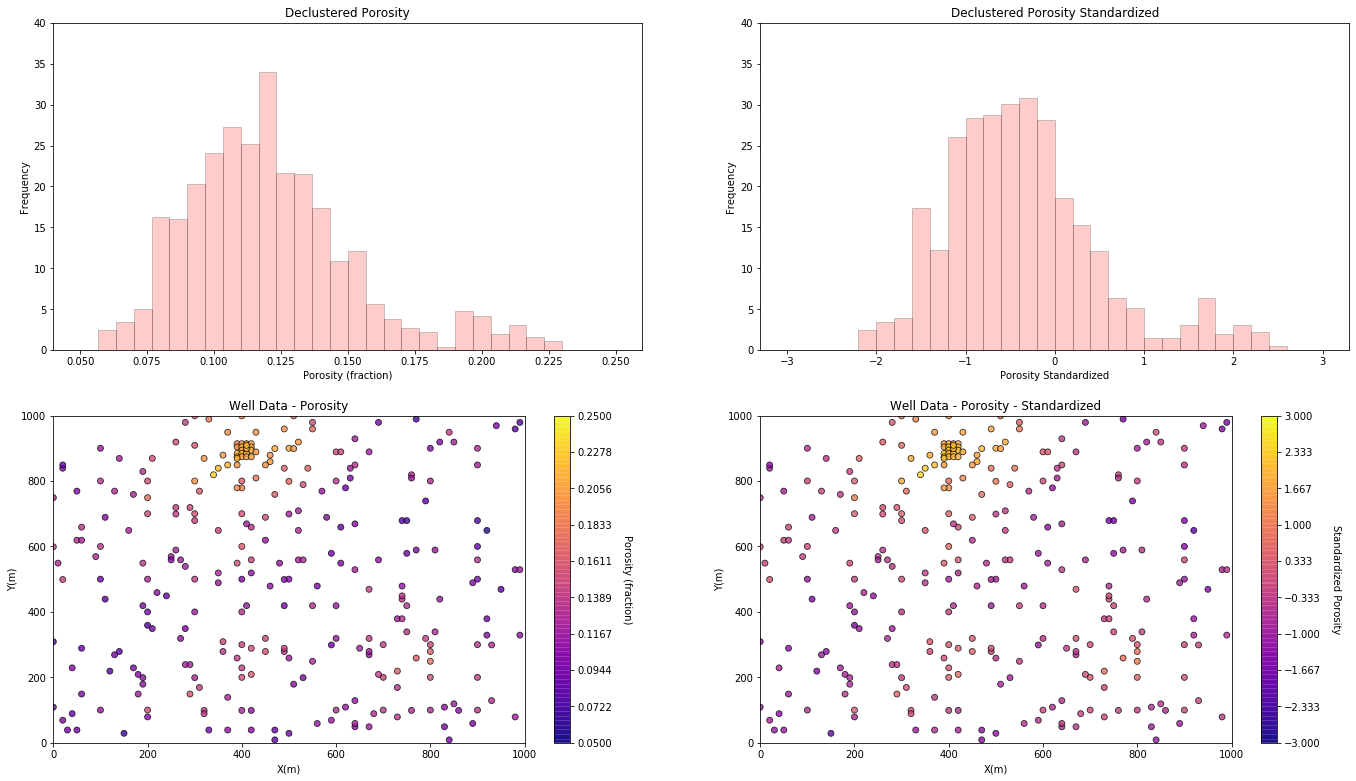

In [15]:
por_original = df['Porosity'].values      # extract the pororsity data as a ndarray
por1 = GSLIB.affine(por_original,0.0,1.0) # rescale the porosity to have a standard distribution
df['standPor'] = por1

plt.subplot(221)
GSLIB.hist_st(df['Porosity'],0.05,0.25,log=False,cumul=False,bins=30,weights=df['Wts'],xlabel="Porosity (fraction)",title="Declustered Porosity")
plt.ylim(0.0,40)

plt.subplot(222)
GSLIB.hist_st(df['standPor'],-3.0,3.0,log=False,cumul=False,bins=30,weights=df['Wts'],xlabel="Porosity Standardized",title="Declustered Porosity Standardized")
plt.ylim(0.0,40)

plt.subplot(223)
GSLIB.locmap_st(df,'X','Y','Porosity',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Porosity','X(m)','Y(m)','Porosity (fraction)',cmap)

plt.subplot(224)
GSLIB.locmap_st(df,'X','Y','standPor',xmin,xmax,ymin,ymax,-3,3,'Well Data - Porosity - Standardized','X(m)','Y(m)','Standardized Porosity',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=2.5, wspace=0.2, hspace=0.2)
plt.show()

Notice that I did not say standard normal? A standard distribution has a mean of 0.0 and standard deviation of 1.0.  The rescaling does not change the distribution shape; therefore, a non-normal (non-Gaussian) distribution cannot become normal just by rescaling.  We'll cover that method in a bit.

Also, notice that the shape is the same and the location maps look exactly the same? By adjusting the minimum and maximum values in the histogram x-axis and the location map color bar, we made them look unchanged! There are minor differences in bars due to the precise locations of the bin boundaries.  

Let's try a minor adjustment as in the case of correcting the porosity from well logs to a more reliable mean and standard deviation or in the case to produce multiple scenarios of the porosity distribution (more on these uncertainty methods later).

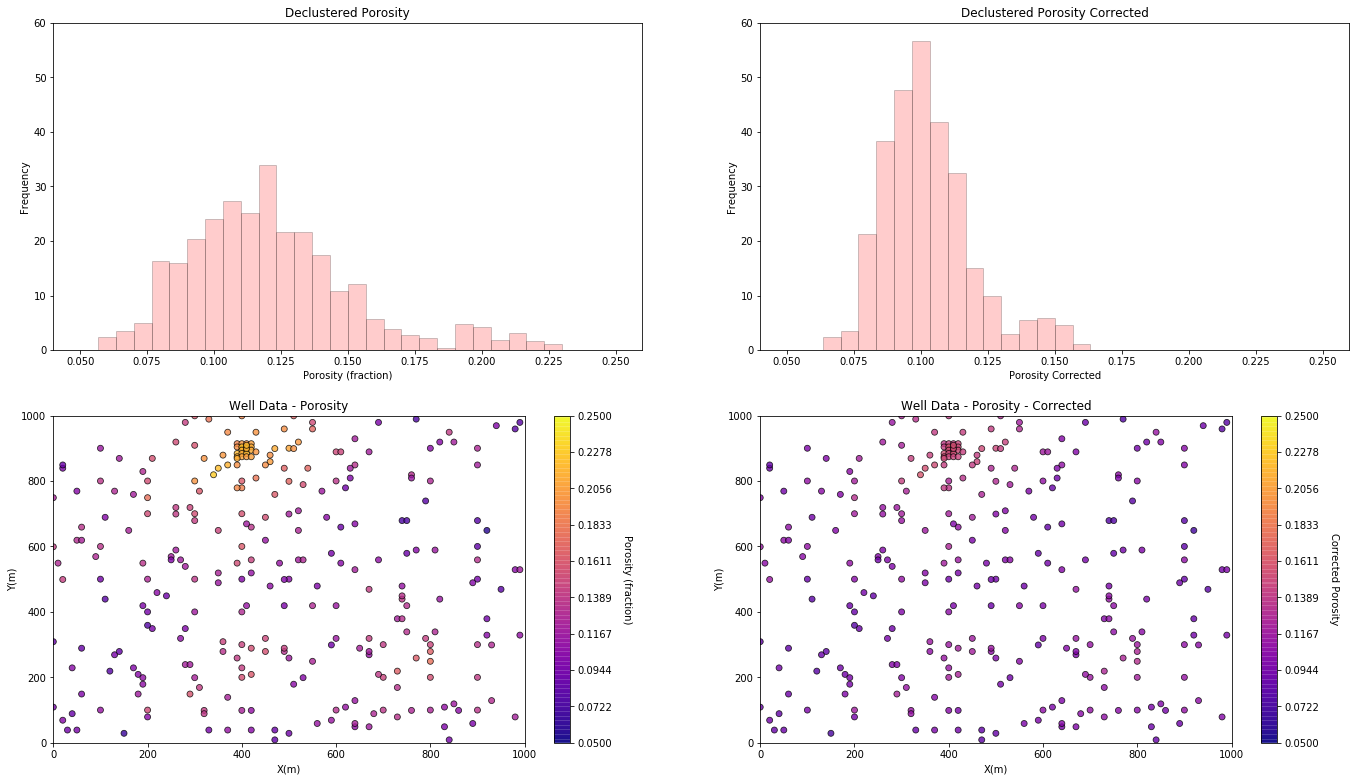

In [16]:
por_original = df['Porosity'].values      # extract the pororsity data as a ndarray
por2 = GSLIB.affine(por_original,0.11,0.02) # rescale the porosity to have a standard distribution
df['adjustedPor'] = por2

plt.subplot(221)
GSLIB.hist_st(df['Porosity'],0.05,0.25,log=False,cumul=False,bins=30,weights=df['Wts'],xlabel="Porosity (fraction)",title="Declustered Porosity")
plt.ylim(0.0,60)

plt.subplot(222)
GSLIB.hist_st(df['adjustedPor'],0.05,0.25,log=False,cumul=False,bins=30,weights=df['Wts'],xlabel="Porosity Corrected",title="Declustered Porosity Corrected")
plt.ylim(0.0,60)

plt.subplot(223)
GSLIB.locmap_st(df,'X','Y','Porosity',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Porosity','X(m)','Y(m)','Porosity (fraction)',cmap)

plt.subplot(224)
GSLIB.locmap_st(df,'X','Y','adjustedPor',xmin,xmax,ymin,ymax,0.05,0.25,'Well Data - Porosity - Corrected','X(m)','Y(m)','Corrected Porosity',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=2.5, wspace=0.2, hspace=0.2)
plt.show()

#### Normal Score Transform / Gaussian Anamorphosis

We showed that the correction of the mean to 0.0 and standard deviation to 1.0 with affine correction does not change the shape; therefore, does not make a Gaussian distributed property. For many statistic / geostatistical methods the assumption of Gaussian distributed is required. We need normal score transforms in many subsurface modeling workflows.

Let's check out the GSLIB NSCORE program translated to Python in GeostatsPy.

In [17]:
geostats.nscore

<function geostatspy.geostats.nscore(df, vcol, wcol=None, ismooth=False, dfsmooth=None, smcol=0, smwcol=0)>

The inputs are primarily the DataFrame, the variable and the data weight columns ('df', 'vcol' and 'wcol'). The remainder of the variables are for the use of a reference distribution. When would you use a reference distribution? This would be the case when you have too few data to perform a reliable transformation and use analog information to inform a more complete distribution to support the transformation.  

As you can see the inputs from weights column ('wcol') have defaults of 0. You can run the function omitting these (e.g. just DataFrame and variable column etc.).

The output form the program include the transformed data, and the trasformation table (discretized values in original and associated Gaussian space). 

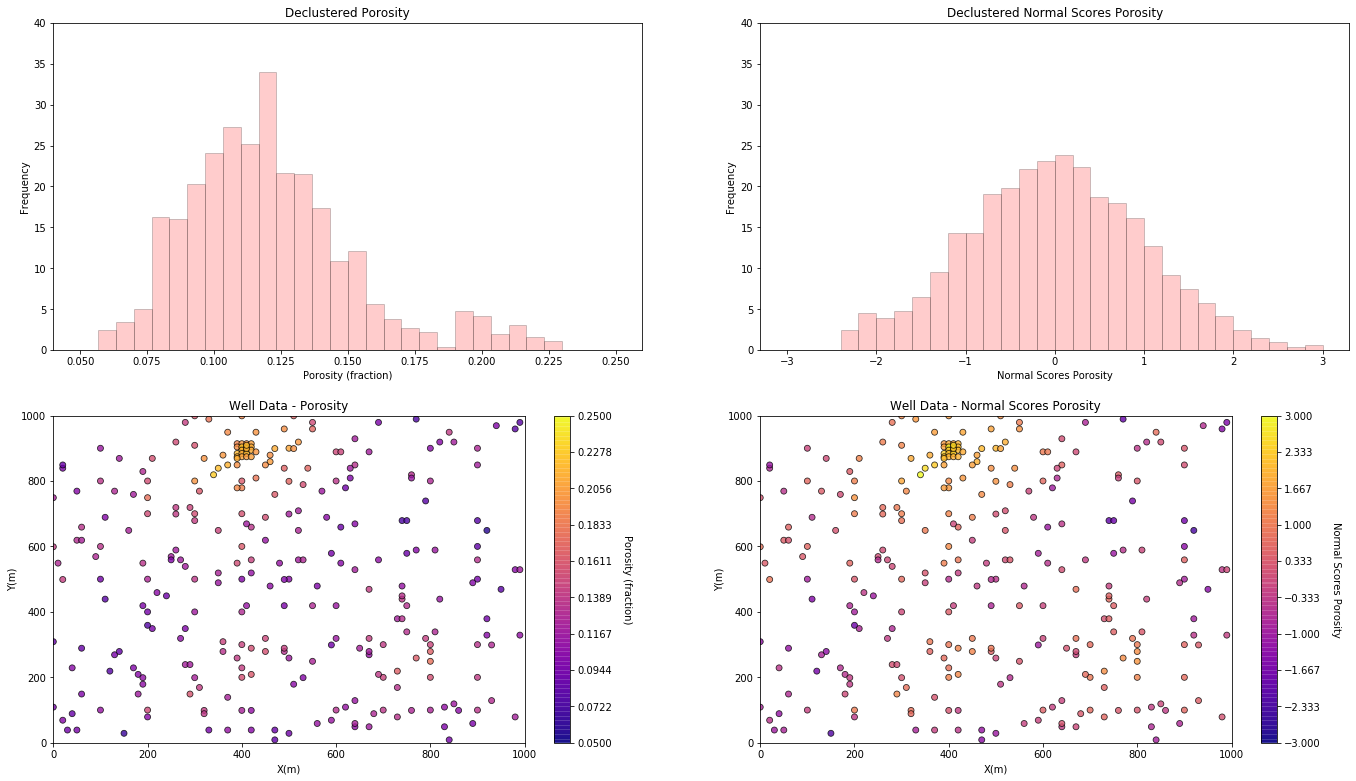

In [18]:
ns_por,trans_vr,trans_ns = geostats.nscore(df,'Porosity','Wts')
df['NPor'] = ns_por

plt.subplot(221)
GSLIB.hist_st(df['Porosity'],0.05,0.25,log=False,cumul=False,bins=30,weights=df['Wts'],xlabel="Porosity (fraction)",title="Declustered Porosity")
plt.ylim(0.0,40)

plt.subplot(222)
GSLIB.hist_st(df['NPor'],-3.0,3.0,log=False,cumul=False,bins=30,weights=df['Wts'],xlabel="Normal Scores Porosity",title="Declustered Normal Scores Porosity")
plt.ylim(0.0,40)

plt.subplot(223)
GSLIB.locmap_st(df,'X','Y','Porosity',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Porosity','X(m)','Y(m)','Porosity (fraction)',cmap)

plt.subplot(224)
GSLIB.locmap_st(df,'X','Y','NPor',xmin,xmax,ymin,ymax,-3.0,3.0,'Well Data - Normal Scores Porosity','X(m)','Y(m)','Normal Scores Porosity',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=2.5, wspace=0.2, hspace=0.2)
plt.show()

That is interesting! Why is the new distribution not perfectly Gaussian in shape? Because it is the declustered distribution of the data transformed to Gaussian. It accounts for the spatial bias in the sampling.

I'm not completely satified with the behavoir of the transformed data distribution at the tails.  The NSCORE programs does not have any tail extrapolation model as found with simulation methods. The transform at the tails is hard to do just from the data alone. When we get into simulation methods we'll check that out.

We should also visualize the transformation table. 

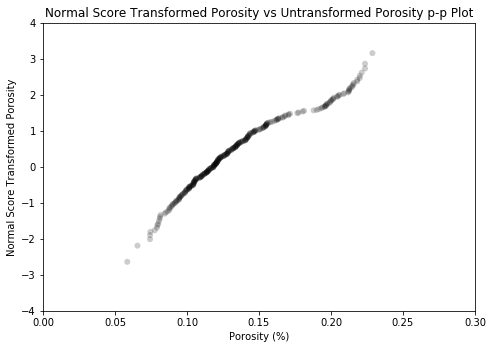

In [19]:
plt.subplot(111)
plt.scatter(trans_vr,trans_ns, c = "black", marker='o', alpha = 0.2, edgecolors = "none")
plt.xlabel('Porosity (%)')
plt.ylabel('Normal Score Transformed Porosity')
plt.title('Normal Score Transformed Porosity vs Untransformed Porosity p-p Plot')
plt.ylim(-4,4)
plt.xlim(0,.30)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

This is a q-q plot that maps the transform from our original distribution to the Gaussian distribution. Notice how the declustering weights have shift up the lowe quantiles as they received more weight.  

As a final step we should check out the summary statistics of all the variants of porosity from our various data transformations.  

In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,289.0,4.758131e+02,254.277530,0.000000,300.000000,430.000000,670.000000,990.000000
Y,289.0,5.296920e+02,300.895374,9.000000,269.000000,549.000000,819.000000,999.000000
Facies,289.0,8.131488e-01,0.390468,0.000000,1.000000,1.000000,1.000000,1.000000
Porosity,289.0,1.347439e-01,0.037745,0.058548,0.106318,0.126167,0.154220,0.228790
Perm,289.0,2.078324e+02,559.359350,0.075819,3.634086,14.908970,71.454424,5308.842566
Wts,289.0,1.000000e+00,0.639743,0.281976,0.670642,0.789486,1.174123,3.984325
standPor,289.0,1.600027e-16,1.001735,-2.022196,-0.754414,-0.227615,0.516880,2.495928
adjustedPor,289.0,1.100000e-01,0.020035,0.069556,0.094912,0.105448,0.120338,0.159919
NPor,289.0,3.876516e-01,1.042739,-2.336338,-0.330268,0.331970,1.118825,3.157063


#### Comments

This was a basic demonstration of data transformations. Much more could be done, I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
I hope this was helpful,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
